In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

In [2]:
with open('../../data/pickle/20221011v5_50y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [3]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [4]:
output = England.players_result
end_year = 2050

## Rateの分布

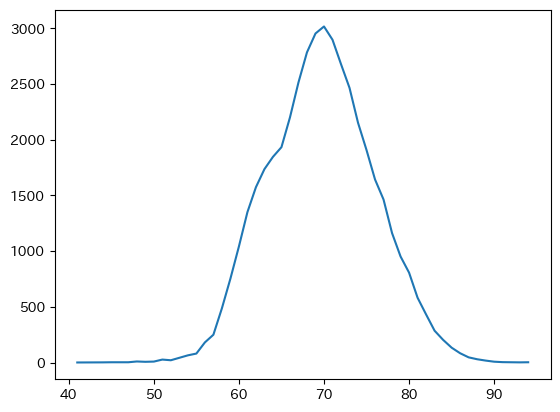

In [5]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

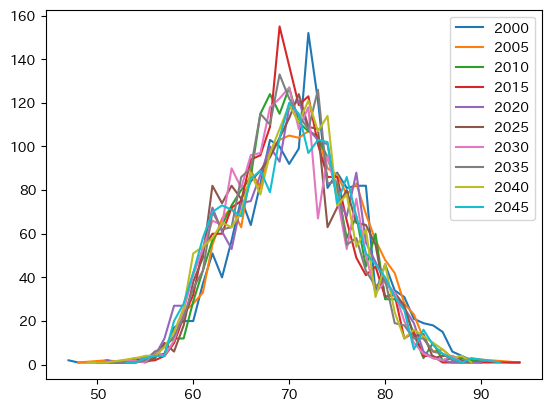

In [6]:
for i in range(2000, 2050, 5):
    output_ = output[output["年度"]==i]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

## ポジションごとのrate

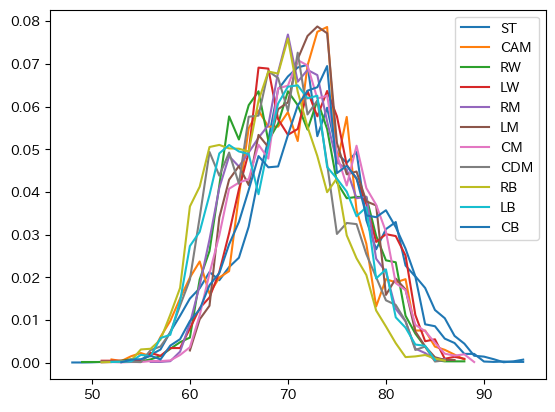

In [7]:
for pos in ALL_POSITON:
    output_ = output[output["ポジション"]==pos]
    if len(output_) < 100:
        continue
    b = output_["Rate"].value_counts().sort_index()
    x = output_["Rate"].unique()
    x.sort()
    plt.plot(x, b/len(output_), label=pos)
plt.legend()
plt.show()

In [8]:
output.groupby("ポジション")["Rate"].describe()

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,2658.0,70.837848,6.020262,52.0,67.0,71.0,75.0,88.0
CB,19775.0,72.774159,6.518203,53.0,68.0,73.0,77.0,94.0
CDM,7395.0,69.383502,5.711133,51.0,65.0,69.0,73.0,86.0
CF,53.0,62.339623,4.305379,54.0,59.0,61.0,66.0,76.0
CM,13302.0,71.759059,5.628813,51.0,68.0,72.0,76.0,89.0
GK,12355.0,71.166329,6.154618,41.0,67.0,71.0,76.0,92.0
LB,6589.0,69.674002,5.917436,52.0,65.0,70.0,74.0,85.0
LM,6298.0,71.569070,5.207348,60.0,68.0,72.0,75.0,87.0
LW,4384.0,71.705748,5.813993,51.0,67.0,72.0,76.0,88.0


## 年代別

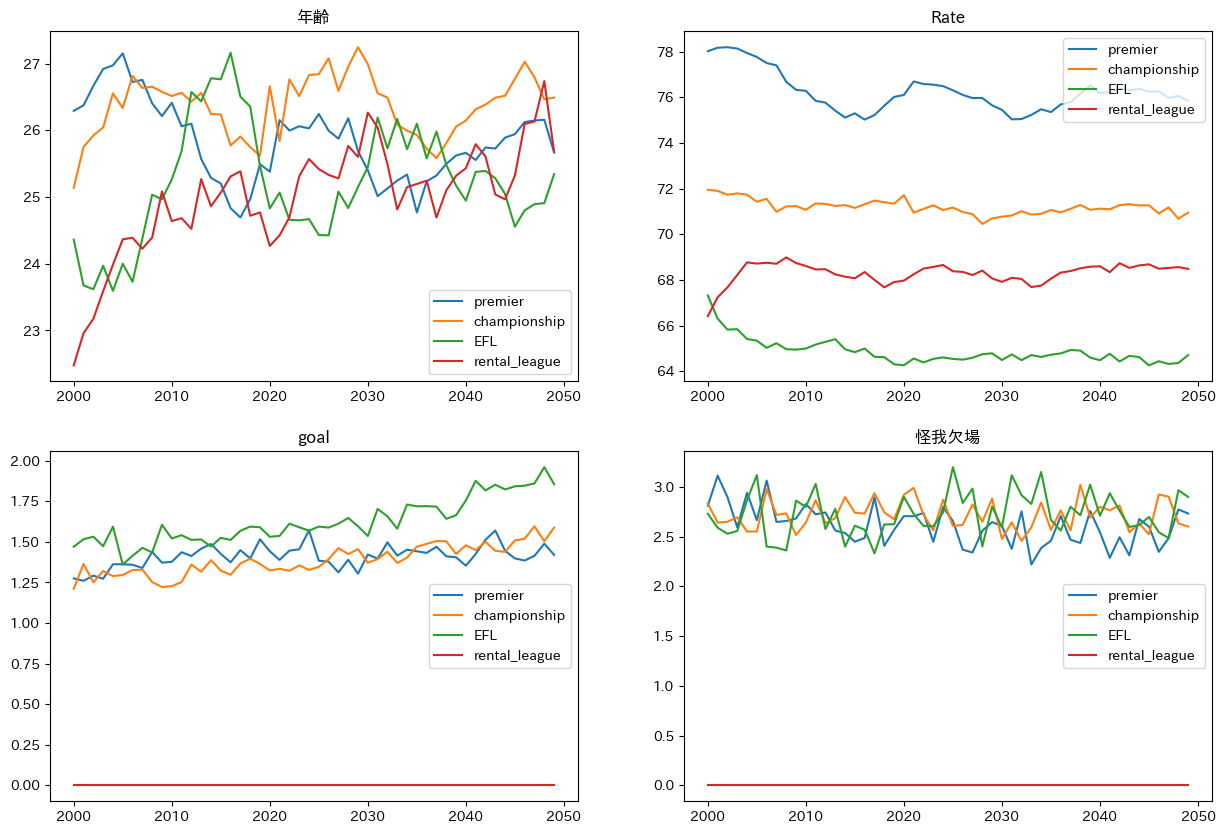

In [9]:
columns = ["年齢", "Rate", "goal", "怪我欠場"]
plt.figure(figsize=(15, 10))
for i, cl in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for league_num in range(3):
        output_ = output[output["リーグ"]==England.leagues[league_num].name]
        plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label=England.leagues[league_num].name)
    output_ = output[output["リーグ"]=="rental_league"]
    plt.plot([y for y in range(2000, end_year)], output_.groupby("年度")[cl].describe()["mean"], label="rental_league")
    plt.title(cl)
    plt.legend()

In [10]:
output_ = output[output["Rate"]>84]
for year in range(2000, end_year, 4):
    _output_ = output_[output_["年度"]==year]
    display(_output_.groupby("Rate").count())

,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
86,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
87,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
88,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
89,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
90,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
93,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
86,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
87,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
88,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
91,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
92,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
88,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
89,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
90,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
92,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
91,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
94,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4
86,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
87,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
86,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
87,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
88,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
86,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
90,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
86,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
87,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
88,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,20,20,20,20,18,20,20,20,20,20,20,20,20,20,20,20,20
86,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
87,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
88,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,24,24,24,24,22,24,24,24,24,24,24,24,24,24,24,24,24
86,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
87,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
92,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,名前,uuid,年齢,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
Rate,,,,,,,,,,,,,,,,,
85,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
86,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
87,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
88,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
89,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [11]:
for year in range(2000, end_year, 10):
    output_ = output[((output["年度"]>=year))]
    output_ = output_[output_["年度"]<year+10]
    display(output_.groupby("ポジション")["Rate"].describe())

,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,579.0,72.129534,5.656439,55.0,69.0,73.0,76.0,86.0
CB,4108.0,74.255355,6.311590,58.0,69.0,74.0,79.0,94.0
CDM,1504.0,71.444814,5.622253,59.0,67.0,71.0,75.0,86.0
CF,18.0,65.055556,5.229692,54.0,62.0,66.0,68.0,76.0
CM,2626.0,73.322925,6.034698,56.0,69.0,73.0,78.0,89.0
GK,2517.0,70.733015,6.679602,41.0,66.0,71.0,76.0,87.0
LB,1282.0,71.932137,5.877031,52.0,67.0,72.0,77.0,85.0
LM,1262.0,72.316957,5.120686,60.0,68.0,72.0,76.0,87.0
LW,999.0,71.904905,6.019505,56.0,68.0,71.0,76.0,88.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,510.0,71.488235,5.959824,55.0,68.00,71.0,75.0,88.0
CB,3994.0,72.911117,5.855883,54.0,69.00,73.0,77.0,94.0
CDM,1506.0,69.826029,5.361634,55.0,66.00,70.0,74.0,82.0
CF,6.0,60.000000,2.097618,58.0,58.25,59.5,61.5,63.0
CM,2679.0,71.349384,5.456836,54.0,67.00,71.0,75.0,88.0
GK,2498.0,70.873098,5.680619,50.0,67.00,71.0,75.0,87.0
LB,1282.0,70.121685,5.434804,56.0,66.00,71.0,74.0,82.0
LM,1234.0,71.337115,5.277364,60.0,67.00,72.0,74.0,86.0
LW,910.0,71.590110,5.628596,56.0,67.00,72.0,76.0,86.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,517.0,70.075435,6.391015,52.0,66.0,70.0,75.0,84.0
CB,3992.0,72.474198,6.229780,54.0,68.0,72.0,77.0,90.0
CDM,1503.0,68.902196,5.703657,51.0,64.0,69.0,72.0,84.0
CF,13.0,60.307692,3.172397,55.0,59.0,60.0,61.0,67.0
CM,2731.0,71.190040,5.673742,52.0,67.0,71.0,75.0,88.0
GK,2402.0,71.444213,6.120307,53.0,67.0,72.0,76.0,88.0
LB,1374.0,69.522562,5.697062,57.0,65.0,70.0,73.0,83.0
LM,1280.0,71.534375,5.402812,60.0,67.0,72.0,76.0,84.0
LW,818.0,71.540342,5.908644,55.0,67.0,71.0,76.0,87.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,517.0,70.011605,5.741514,52.0,66.00,71.0,74.0,86.0
CB,3854.0,72.600934,6.791933,53.0,68.00,72.0,77.0,88.0
CDM,1422.0,68.281294,5.308199,56.0,64.00,68.0,71.0,83.0
CF,6.0,62.333333,3.011091,59.0,60.25,61.5,65.0,66.0
CM,2663.0,71.350357,5.372808,51.0,67.00,71.0,75.0,85.0
GK,2490.0,70.889157,5.309747,48.0,67.00,71.0,74.0,88.0
LB,1324.0,68.578550,5.886225,54.0,64.00,68.0,72.0,83.0
LM,1250.0,71.233600,5.043906,60.0,67.00,71.0,75.0,84.0
LW,825.0,71.530909,5.722917,53.0,67.00,71.0,75.0,85.0


,count,mean,std,min,25%,50%,75%,max
ポジション,,,,,,,,
CAM,535.0,70.355140,6.070825,54.0,66.00,70.0,74.00,86.0
CB,3827.0,71.528612,7.074276,54.0,66.00,71.0,76.00,89.0
CDM,1460.0,68.372603,5.926284,56.0,64.00,68.0,72.00,84.0
CF,10.0,61.500000,3.064129,59.0,59.25,60.5,61.75,67.0
CM,2603.0,71.618133,5.300516,55.0,68.00,72.0,75.00,87.0
GK,2448.0,71.920343,6.782314,48.0,67.00,72.5,77.00,92.0
LB,1327.0,68.309721,5.973654,55.0,64.00,68.0,73.00,84.0
LM,1272.0,71.416667,5.118053,61.0,68.00,71.0,75.00,85.0
LW,832.0,71.929087,5.757308,51.0,68.00,73.0,76.00,86.0


## 18歳のRate

In [12]:
output[output["年齢"]==18]["Rate"].value_counts().sort_index()

54      9
55     12
56     60
57    111
58    299
59    468
60    583
61    645
62    605
63    522
64    440
65    491
66    644
67    908
68    973
69    981
70    786
71    549
72    285
73    147
74     80
75     45
76     28
77     13
78      8
79      4
80      4
Name: Rate, dtype: int64

In [53]:
output[((output["年齢"]==18)&(output["Rate"]==77))]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
39,Achilles,ff8d630a-4931-11ed-8556-21dd9ad8cc71,18,77,3,ST,rental_league,2000,rental_team,Manchester,レンタルリーグ,記録なし,30,0,0,0,0,
59984,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,18,77,3,LW,premier,2018,Swansea,,リーグ,13位,35,2,1,6,4,
59985,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,18,77,3,LW,premier,2018,Swansea,,カップ戦,13位,1,0,0,0,0,
82935,Daxten,ac55822a-4932-11ed-8556-21dd9ad8cc71,18,77,3,LM,premier,2025,Paisley,,リーグ,3位,21,2,3,9,2,
82936,Daxten,ac55822a-4932-11ed-8556-21dd9ad8cc71,18,77,3,LM,premier,2025,Paisley,,カップ戦,3位,3,3,1,2,0,
90300,Cardin,ba05b8a4-4932-11ed-8556-21dd9ad8cc71,18,77,4,CM,premier,2027,Stoke-on-Trent,,リーグ,18位,8,0,1,0,0,
90301,Cardin,ba05b8a4-4932-11ed-8556-21dd9ad8cc71,18,77,4,CM,premier,2027,Stoke-on-Trent,,カップ戦,18位,0,0,0,0,0,
104757,Kim,4d5306e6-4935-11ed-8556-21dd9ad8cc71,18,77,3,ST,EFL,2031,Gothenburg,,リーグ,5位,35,39,11,3,4,"得点王(EFL_2031),"
104758,Kim,4d5306e6-4935-11ed-8556-21dd9ad8cc71,18,77,3,ST,EFL,2031,Gothenburg,,カップ戦,5位,1,0,0,0,0,
139755,Marcell,8b520406-4935-11ed-8556-21dd9ad8cc71,18,77,4,LM,premier,2042,Newcastle,,リーグ,20位,38,1,1,0,0,


,名前,年齢,生まれ年,成長タイプ
5747,Orie,37,1999,general


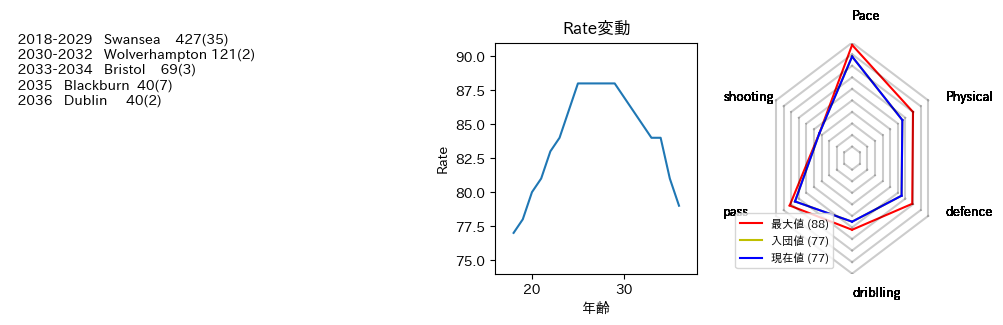

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
59984,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,18,77,3,LW,premier,2018,Swansea,,リーグ,13位,35,2,1,6,4,
63176,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,19,78,2,RW,premier,2019,Swansea,,リーグ,9位,24,1,4,8,0,
66461,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,20,80,1,CM,premier,2020,Swansea,,リーグ,2位,29,8,4,12,0,
69759,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,21,81,0,CM,premier,2021,Swansea,,リーグ,5位,38,3,6,11,0,
73047,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,22,83,3,CM,premier,2022,Swansea,,リーグ,5位,38,2,4,9,0,
76345,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,23,84,2,CM,premier,2023,Swansea,,リーグ,8位,38,3,7,12,0,
79653,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,24,86,1,CB,premier,2024,Swansea,,リーグ,11位,36,2,2,8,3,
82951,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,25,88,0,CB,premier,2025,Swansea,,リーグ,10位,28,2,3,7,11,
86291,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,26,88,3,CM,premier,2026,Swansea,,リーグ,4位,38,2,4,9,0,
89572,Orie,7b751472-4932-11ed-8556-21dd9ad8cc71,27,88,2,CM,premier,2027,Swansea,,リーグ,2位,36,4,5,15,2,


In [54]:
uuid_ = "7b751472-4932-11ed-8556-21dd9ad8cc71"
print_player(England, all_member, uuid_)

## 怪我割合

In [14]:
print(output["怪我欠場"].sum()/3/20/(end_year-2000))
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

134.20633333333336
0     64544
1      6904
2      3427
3      2940
4      2737
5      2423
6      2250
7      2204
8      2031
10     1791
9      1783
11     1687
12     1604
13     1425
14     1358
15     1170
16     1090
17      969
18      838
19      734
20      688
21      602
22      486
23      484
24      390
25      326
26      280
27      254
28      218
29      156
30      144
31      122
32      109
33       83
34       66
35       44
37       30
36       27
38        4
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [15]:
output[output["Rate"]>89].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場
uuid,,,,,,,,,
0082d39e-4932-11ed-8556-21dd9ad8cc71,27.5,90.000000,0.833333,2009.5,19.333333,0.916667,0.416667,9.500000,3.000000
22d36aa8-4932-11ed-8556-21dd9ad8cc71,28.0,92.571429,0.428571,2015.0,17.642857,1.500000,1.000000,7.500000,3.857143
3db12612-4932-11ed-8556-21dd9ad8cc71,28.0,90.000000,0.800000,2019.0,20.200000,0.600000,0.900000,7.400000,1.300000
63100006-4935-11ed-8556-21dd9ad8cc71,27.5,91.666667,0.666667,2044.5,17.500000,0.000000,0.000000,9.250000,4.500000
ac5666a4-4932-11ed-8556-21dd9ad8cc71,25.5,90.000000,1.500000,2032.5,15.250000,18.000000,4.750000,9.250000,6.250000
ff9600b4-4931-11ed-8556-21dd9ad8cc71,29.0,92.777778,0.888889,2005.0,19.222222,0.333333,0.555556,9.944444,2.166667
ffb492d6-4931-11ed-8556-21dd9ad8cc71,29.5,93.000000,0.500000,2000.5,12.000000,7.000000,2.000000,2.750000,9.500000
ffbf4500-4931-11ed-8556-21dd9ad8cc71,30.0,90.000000,2.000000,2000.0,19.000000,1.000000,0.000000,5.500000,2.000000
ffcc11f4-4931-11ed-8556-21dd9ad8cc71,32.0,90.000000,1.000000,2000.0,20.500000,0.000000,0.500000,8.000000,0.000000


## チーム能力

In [ ]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

### チーム得点

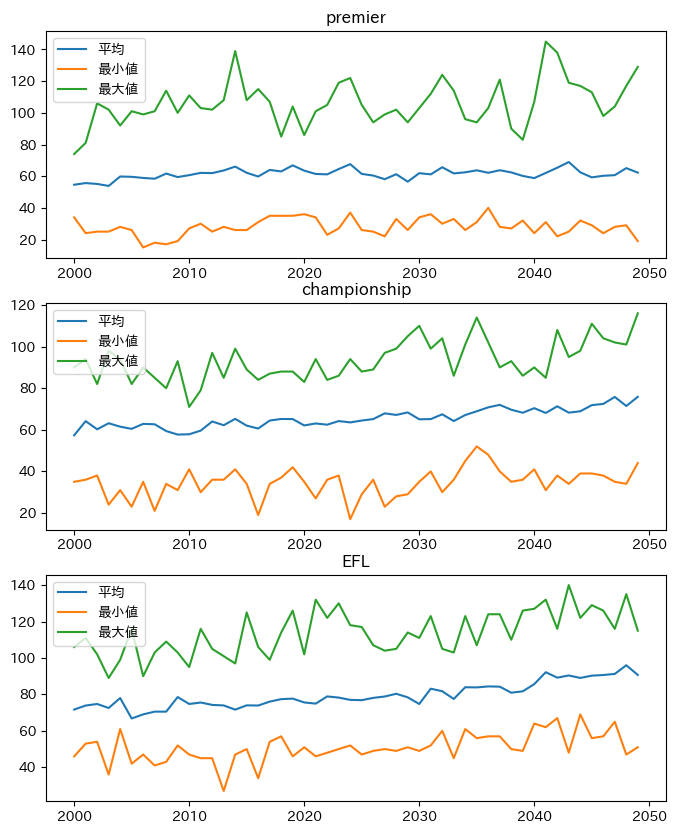

In [42]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["得点"].mean())
        mi.append(output_["得点"].min())
        ma.append(output_["得点"].max())
        st.append(output_["得点"].std())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

### 勝ち点

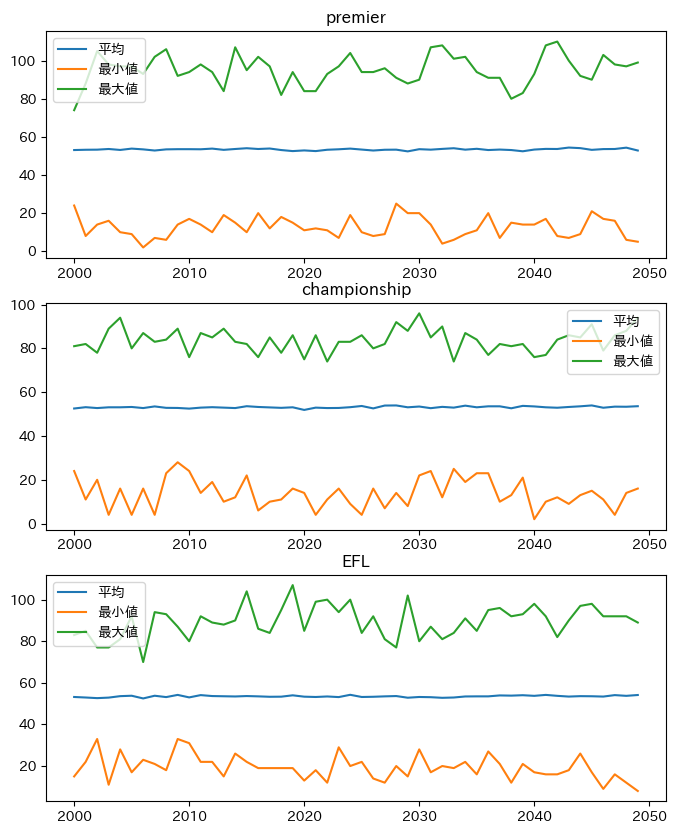

In [45]:
figure = plt.figure(figsize=(8, 10))
for league_num in range(3):
    me = []
    mi = []
    ma = []
    st = []
    for year in range(2000, end_year):
        output_ = England.leagues[league_num].team_result[f"{England.leagues[league_num].name}_{year}"]
        me.append(output_["Points"].mean())
        mi.append(output_["Points"].min())
        ma.append(output_["Points"].max())
        x = [y for y in range(2000, end_year)]
    plt.subplot(3, 1, league_num+1)
    plt.plot(x, me, label="平均")
    plt.plot(x, mi, label="最小値")
    plt.plot(x, ma, label="最大値")
    #plt.plot(x, st, label="標準偏差")
    plt.title(f"{England.leagues[league_num].name}")
    plt.legend()
plt.show()

In [44]:
output_

,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
Sunderland,22,8,8,72,29,43,74,1位,premier
Richmond,20,10,8,65,49,16,68,2位,premier
Newark,20,10,8,68,57,11,68,3位,premier
Blackburn,19,9,10,53,36,17,67,4位,premier
Shrewsbury,20,11,7,74,53,21,67,5位,premier
Wrexham,21,15,2,61,54,7,65,6位,premier
Bangor,18,12,8,58,49,9,62,7位,premier
Wolverhampton,18,13,7,59,37,22,61,8位,premier
Crewe,17,11,10,62,46,16,61,9位,premier
Paisley,17,11,10,52,34,18,61,10位,premier


## 引退年齢

In [17]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
27      7
28     13
29     47
30    159
31    388
32    653
33    842
34    932
35    919
36    676
37    479
38    231
39     83
40     29
dtype: int64

## 成長タイプ

In [18]:
all_member["成長タイプ"].value_counts()

general    5145
grass      1324
genius      726
legend       63
Name: 成長タイプ, dtype: int64

In [19]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
2405,Masiah,Dundee,EFL,ffd392c6-4931-11ed-8556-21dd9ad8cc71,39,1982,RB,71,legend,76,53,61,61,68,72,引退
6921,Dirck,Dundee,EFL,ba05892e-4932-11ed-8556-21dd9ad8cc71,39,2008,RB,69,legend,68,33,63,70,65,65,引退
5378,Williom,Dundee,EFL,591d04de-4932-11ed-8556-21dd9ad8cc71,39,1994,ST,71,legend,67,71,66,72,26,58,引退
6035,Mekhi,Dundee,EFL,8210a53a-4932-11ed-8556-21dd9ad8cc71,38,2000,GK,61,legend,15,15,15,15,15,15,引退
4362,Orvel,Dundee,EFL,22d36aa8-4932-11ed-8556-21dd9ad8cc71,38,1986,LW,79,legend,81,62,78,76,69,71,引退
2609,Rosendo,Dundee,EFL,ffb492d6-4931-11ed-8556-21dd9ad8cc71,38,1982,ST,77,legend,62,77,72,68,35,76,引退
3730,Antonios,Dundee,EFL,ff718f7c-4931-11ed-8556-21dd9ad8cc71,37,1982,CM,78,legend,74,62,78,77,69,72,引退
5844,Kamari,Dundee,EFL,820c7a14-4932-11ed-8556-21dd9ad8cc71,37,2000,GK,76,legend,15,15,15,15,15,15,引退
7178,Radford,Dundee,EFL,4d4064b4-4935-11ed-8556-21dd9ad8cc71,37,2012,GK,72,legend,15,15,15,15,15,15,引退
4144,Notnamed,Dundee,EFL,1c06dc64-4932-11ed-8556-21dd9ad8cc71,36,1985,ST,66,legend,63,66,52,62,20,52,引退


In [20]:
buff = output[output["分類"]=="練習リーグ"]
buff[buff["Rate"]>68].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞


In [22]:
p = search_player(England, all_member, uuid_)

In [23]:
p.shooting_exp

-9.72

In [24]:
p.shooting_initial

92

In [25]:
output

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
0,Luisantonio,ff5460aa-4931-11ed-8556-21dd9ad8cc71,18,72,4,ST,rental_league,2000,rental_team,Glasgow,レンタルリーグ,記録なし,30,0,0,0,0,
1,Wilton,ff54e8c2-4931-11ed-8556-21dd9ad8cc71,23,77,2,ST,rental_league,2000,rental_team,Glasgow,レンタルリーグ,記録なし,30,0,0,0,0,
2,Jontavious,ff59506a-4931-11ed-8556-21dd9ad8cc71,18,72,3,ST,rental_league,2000,rental_team,Glasgow,レンタルリーグ,記録なし,30,0,0,0,0,
3,Zakariye,ff596870-4931-11ed-8556-21dd9ad8cc71,18,71,4,ST,rental_league,2000,rental_team,Glasgow,レンタルリーグ,記録なし,30,0,0,0,0,
4,Logan,ff59b14a-4931-11ed-8556-21dd9ad8cc71,18,70,4,GK,rental_league,2000,rental_team,Glasgow,レンタルリーグ,記録なし,30,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165125,Toy,9bd447a8-4935-11ed-8556-21dd9ad8cc71,22,62,0,GK,practice_league,2049,practice_team,,練習リーグ,記録なし,20,0,0,0,0,
165126,Leomar,964da252-4935-11ed-8556-21dd9ad8cc71,23,59,0,LB,practice_league,2049,practice_team,,練習リーグ,記録なし,20,0,0,0,0,
165127,Ashlee,ceabf7dc-4932-11ed-8556-21dd9ad8cc71,37,63,0,GK,所属なし,2049,所属なし,NaN,自主練,記録なし,0,0,0,0,0,
165128,Jarratt,9bd31a0e-4935-11ed-8556-21dd9ad8cc71,22,63,0,GK,practice_league,2049,practice_team,,練習リーグ,記録なし,20,0,0,0,0,
